Use Decision Trees to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


In [63]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
  
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix



In [64]:
fc = pd.read_csv("Fraud_check.csv")

In [65]:
fc.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [66]:
fc.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [67]:
fc=pd.get_dummies(fc,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)

In [68]:
#Creating new cols TaxInc and dividing 'Taxable.Income' cols on the basis of [10002,30000,99620] for Risky and Good
fc["TaxInc"] = pd.cut(fc["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [69]:
print(fc)

     Taxable.Income  City.Population  Work.Experience  Undergrad_YES  \
0             68833            50047               10              0   
1             33700           134075               18              1   
2             36925           160205               30              0   
3             50190           193264               15              1   
4             81002            27533               28              0   
..              ...              ...              ...            ...   
595           76340            39492                7              1   
596           69967            55369                2              1   
597           47334           154058                0              0   
598           98592           180083               17              1   
599           96519           158137               16              0   

     Marital.Status_Married  Marital.Status_Single  Urban_YES TaxInc  
0                         0                      1          1   

#Assuptions : taxable_income <= 30000 as “Risky=0” and others are “Good=1”

In [70]:
fc = pd.get_dummies(fc,columns = ["TaxInc"],drop_first=True)

In [71]:
fc.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
0,68833,50047,10,0,0,1,1,1
1,33700,134075,18,1,0,0,1,1
2,36925,160205,30,0,1,0,1,1
3,50190,193264,15,1,0,1,1,1
4,81002,27533,28,0,1,0,0,1


Normalization of data

In [72]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [73]:
# Normalized data frame 
fc_norm = norm_func(fc.iloc[:,1:])
fc_norm.tail(10)

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
590,0.341473,0.466667,0.0,1.0,0.0,1.0,1.0
591,0.615406,0.600000,1.0,0.0,1.0,1.0,0.0
592,0.283703,0.533333,1.0,0.0,1.0,0.0,1.0
593,0.610256,0.333333,0.0,0.0,0.0,1.0,1.0
594,0.412341,0.300000,0.0,1.0,0.0,1.0,1.0
595,0.078811,0.233333,1.0,0.0,0.0,1.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0,1.0
599,0.760683,0.533333,0.0,0.0,0.0,0.0,1.0


In [74]:
# Declaring features & target
X = fc_norm.iloc[:,0:6]
Y = fc_norm.iloc[:,6]

In [75]:
X

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,0.139472,0.333333,0.0,0.0,1.0,1.0
1,0.622394,0.600000,1.0,0.0,0.0,1.0
2,0.772568,1.000000,0.0,1.0,0.0,1.0
3,0.962563,0.500000,1.0,0.0,1.0,1.0
4,0.010081,0.933333,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
595,0.078811,0.233333,1.0,0.0,0.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0


In [76]:
Y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
595    1.0
596    1.0
597    1.0
598    1.0
599    1.0
Name: TaxInc_Good, Length: 600, dtype: float64

In [77]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

In [78]:
##Converting the Taxable income variable to bucketing. 
fc_norm["income"]="<=30000"
fc_norm.loc[fc["Taxable.Income"]>=30000,"income"]="Good"
fc_norm.loc[fc["Taxable.Income"]<=30000,"income"]="Risky"

In [79]:
##Droping the Taxable income variable
fc.drop(["Taxable.Income"],axis=1,inplace=True)

In [80]:
fc.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","City.Population":"population","Work.Experience":"experience","Urban":"urban"},inplace=True)

In [81]:
labelenc=preprocessing.LabelEncoder()
for column_name in fc.columns:
    if fc[column_name].dtype == object:
        fc[column_name] = labelenc.fit_transform(fc[column_name])
    else:
        pass

In [82]:
##Splitting the data into featuers and labels
features = fc.iloc[:,0:5]
labels = fc.iloc[:,5]

In [83]:
## Collecting the column names
colnames = list(fc.columns)
predictors = colnames[0:5]
target = colnames[5]

In [84]:
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2,stratify = labels)

In [85]:
##Model building
from sklearn.ensemble import RandomForestClassifier as RF
model = RF(n_jobs = 3,n_estimators = 15, oob_score = True, criterion = "entropy")
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [86]:
model.estimators_
model.classes_
model.n_classes_

2

In [87]:
model.n_outputs_

1

In [88]:
model.oob_score_
###74.7833%

0.5125

In [89]:
##Predictions on train data
prediction = model.predict(x_train)

In [90]:
##Accuracy
accuracy = accuracy_score(y_train,prediction)

In [91]:
np.mean(prediction == y_train)

0.9875

In [92]:

confusion = confusion_matrix(y_train,prediction)

In [93]:
##Prediction on test data
pred_test = model.predict(x_test)

In [94]:
##Accuracy
acc_test =accuracy_score(y_test,pred_test)
##78.333%

# Building Decision Tree Classifier using Entropy Criteria

In [95]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [96]:
from sklearn import tree

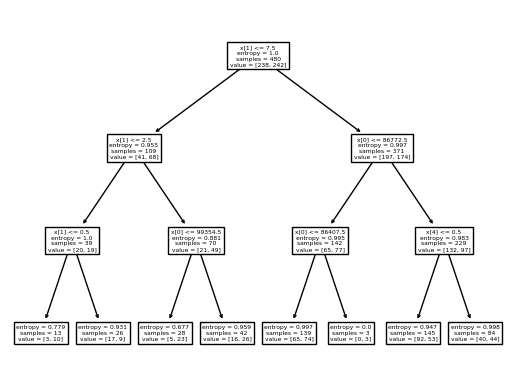

In [97]:
#PLot the decision tree
tree.plot_tree(model);

In [98]:
colnames = list(fc.columns)
colnames

['population',
 'experience',
 'Undergrad_YES',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_YES',
 'TaxInc_Good']

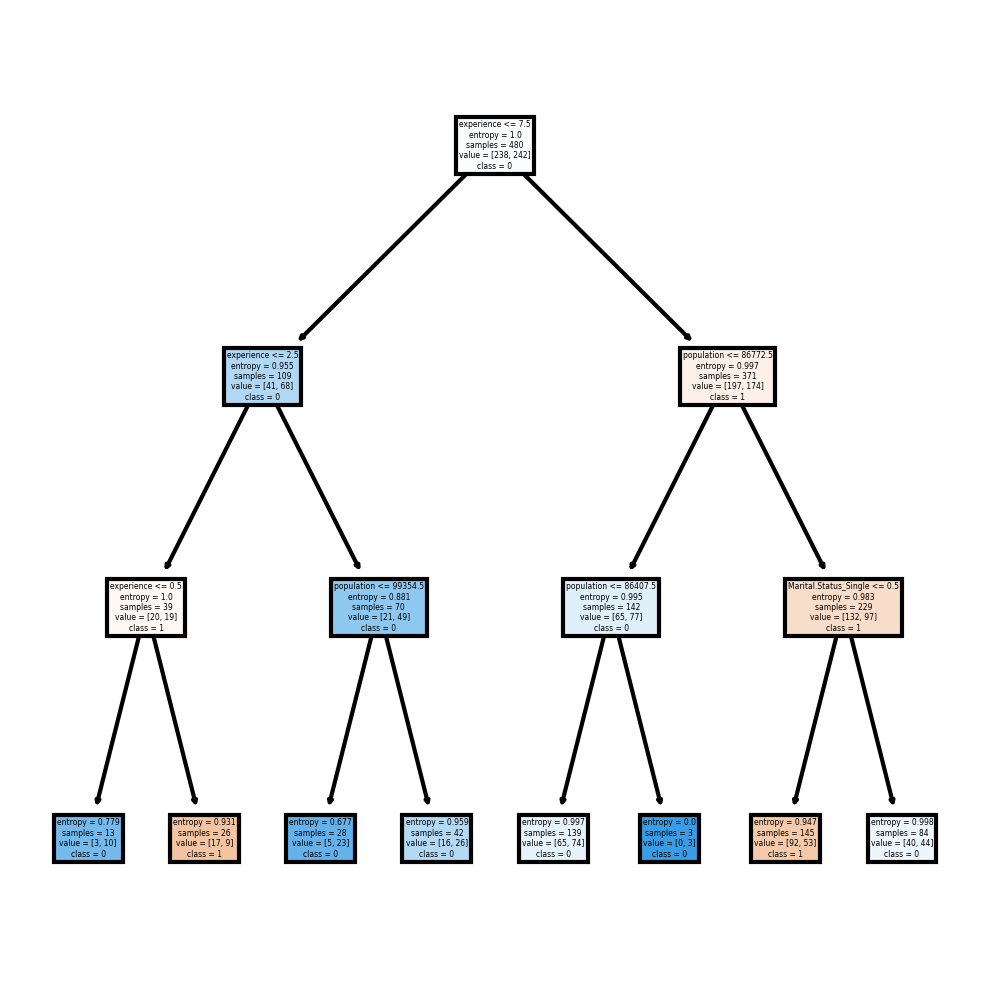

In [99]:
fn=['population','experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES']
cn=['1', '0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [100]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    76
0    44
dtype: int64

In [101]:
preds

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1], dtype=uint8)

In [102]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Urban_YES,,
0,19,41
1,25,35


In [103]:
# Accuracy 
np.mean(preds==y_test)

0.45

# Building Decision Tree Classifier (CART) using Gini Criteria

In [104]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [105]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [106]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.45